# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date
import math

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [166]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
countries = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [167]:
# Set the API base URL
# I added a call to the openweatherapi location api to find the country code and location of each city
location_url = f"http://api.openweathermap.org/geo/1.0/direct?"
weather_url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = location_url + f"q={city.capitalize()}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_location = requests.get(city_url).json()
        
        lat = city_location[0]["lat"]
        lon = city_location[0]["lon"]
        appended_weather = weather_url + f"lat={lat}&lon={lon}&appid={weather_api_key}&units=metric"
        city_weather = requests.get(appended_weather).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_location[0]["lat"]
        city_lng = city_location[0]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_location[0]["country"]
        city_date = date.today()

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | kapuskasing
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | afif
Processing Record 5 of Set 1 | sete
Processing Record 6 of Set 1 | jayapura
Processing Record 7 of Set 1 | tocopilla
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | nolinsk
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | kudahuvadhoo
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | afaahiti
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | mount isa
Processing Record 17 of Set 1 | albu kamal
Processing Record 18 of Set 1 | rio gallegos
Processing Record 19 of Set 1 | puerto aysen
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | vangaindrano
Processing Record 22 of Set 1 | cadale
Processing Recor

In [168]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [169]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.561470,-52.712616,14.66,91,100,3.09,CA,2024-09-30
1,kapuskasing,49.416667,-82.433333,20.00,40,20,5.66,CA,2024-09-30
2,iqaluit,63.749440,-68.521857,7.97,70,75,2.57,CA,2024-09-30
3,afif,23.902370,42.915085,27.77,15,2,4.62,SA,2024-09-30
4,sete,43.401443,3.695977,18.92,79,48,2.83,FR,2024-09-30


In [170]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [171]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.561470,-52.712616,14.66,91,100,3.09,CA,2024-09-30
1,kapuskasing,49.416667,-82.433333,20.00,40,20,5.66,CA,2024-09-30
2,iqaluit,63.749440,-68.521857,7.97,70,75,2.57,CA,2024-09-30
3,afif,23.902370,42.915085,27.77,15,2,4.62,SA,2024-09-30
4,sete,43.401443,3.695977,18.92,79,48,2.83,FR,2024-09-30


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

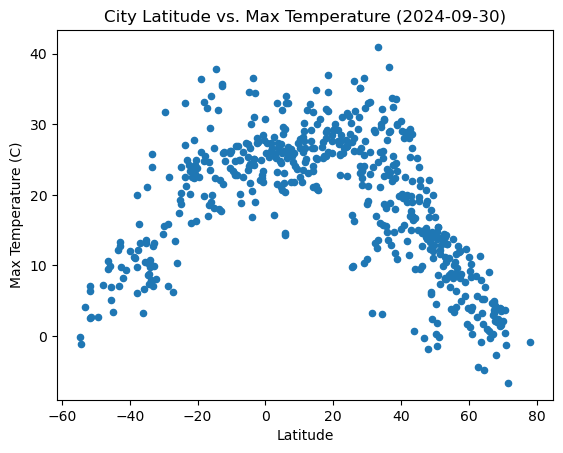

In [172]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(
    kind="scatter",
    x="Lat",
    y="Max Temp"
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({date.today()})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

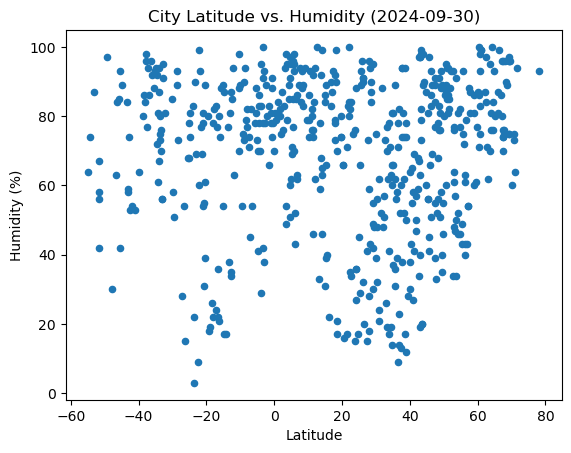

In [173]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(
    kind="scatter",
    x="Lat",
    y="Humidity"
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date.today()})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

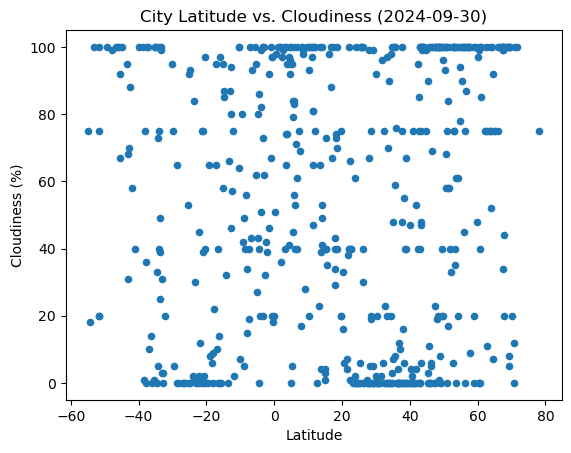

In [174]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(
    kind="scatter",
    x="Lat",
    y="Cloudiness"
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date.today()})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

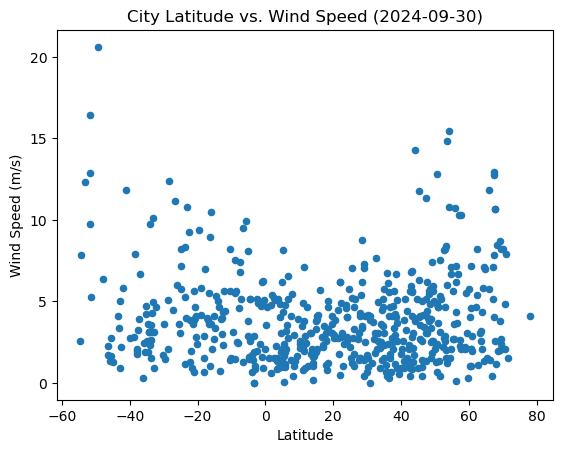

In [175]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(
    kind="scatter",
    x="Lat",
    y="Wind Speed"
)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date.today()})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [176]:
# Define a function to create Linear Regression plots
# **regression_df** is the dataframe that the user wants to plot / wants to find a regession on
# **x_col_name / y_col_name** represent the column names in regression_df that are being plotted
# **x_lab / y_lab** represent the x and y labels for the graph
# **title** represents the title of the graph
# **ann_x / ann_y** represents the location that the user wants to display the regression equation
def create_linear_regession(regression_df, x_col_name, y_col_name, x_lab, y_lab, title, ann_x, ann_y):
    # Getting the x and y vals to calculate the regression values
    x_vals = regression_df[x_col_name]
    y_vals = regression_df[y_col_name]

    # Calculating the regression values using the linregress() function
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)

    # Printing the r^2-value
    print(f"The r^2-value is: {rvalue}")
    
    # Max and min vals calculated here to find the range of x values the regression
    # vals needs to cover
    max_x = math.ceil(regression_df[x_col_name].max())
    min_x = math.floor(regression_df[x_col_name].min())
    
    # Calculating the x and y vals that will be used to plot the regression
    regression_x_vals = range(min_x, max_x + 1)
    regression_y_vals = [slope * reg_x + intercept for reg_x in regression_x_vals]

    # Plotting the given x and y values defined by the user
    regression_df.plot(
        kind="scatter",
        x = x_col_name,
        y = y_col_name
    )
    
    # Plotting the regression line
    plt.plot(
        regression_x_vals,
        regression_y_vals,
        c = "red",
    )

    # Annotating the graph with the regression line equation
    plt.annotate(
        f"y = {round(slope, 2)}x + {round(intercept, 2)}",
        c = "red",
        xy=(ann_x, ann_y)
    )

    # Adding the user defined labels and title
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title)

    # Showing the plot
    plt.show()


In [177]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_data = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.561470,-52.712616,14.66,91,100,3.09,CA,2024-09-30
1,kapuskasing,49.416667,-82.433333,20.00,40,20,5.66,CA,2024-09-30
2,iqaluit,63.749440,-68.521857,7.97,70,75,2.57,CA,2024-09-30
3,afif,23.902370,42.915085,27.77,15,2,4.62,SA,2024-09-30
4,sete,43.401443,3.695977,18.92,79,48,2.83,FR,2024-09-30


In [178]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_data = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,jayapura,-2.538754,140.703739,27.34,89,42,1.96,ID,2024-09-30
6,tocopilla,-22.088719,-70.196066,20.10,60,45,3.85,CL,2024-09-30
7,waitangi,-35.270465,174.080459,13.64,93,100,4.73,NZ,2024-09-30
9,bredasdorp,-34.533055,20.042778,8.71,72,33,3.62,ZA,2024-09-30
11,grytviken,-54.280648,-36.509800,-1.10,74,18,7.84,GS,2024-09-30


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.7730922477155


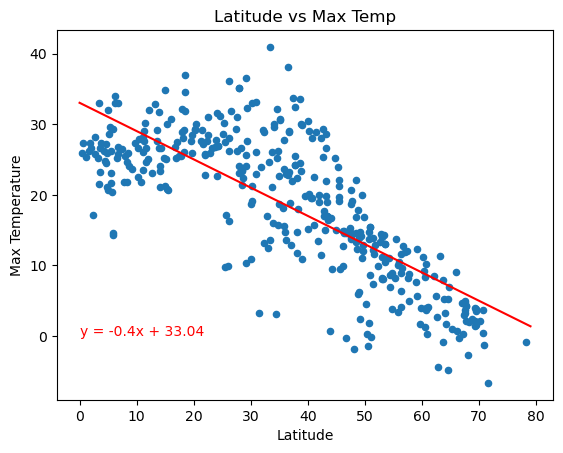

In [179]:
# Linear regression on Northern Hemisphere
create_linear_regession(
    regression_df = northern_hemi_data,
    x_col_name = "Lat",
    y_col_name = "Max Temp",
    x_lab = "Latitude",
    y_lab = "Max Temperature",
    title = f"Latitude vs Max Temp",
    ann_x = 0,
    ann_y = 0
)

The r^2-value is: 0.7902256087895091


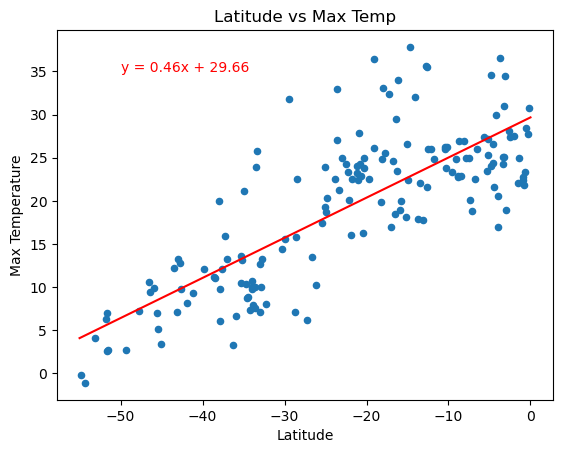

In [180]:
# Linear regression on Southern Hemisphere
create_linear_regession(
    regression_df = southern_hemi_data,
    x_col_name = "Lat",
    y_col_name = "Max Temp",
    x_lab = "Latitude",
    y_lab = "Max Temperature",
    title = f"Latitude vs Max Temp",
    ann_x = -50,
    ann_y = 35
)

**Discussion about the linear relationship:**

We can be reasonably sure of the linear correlation between latitude and temperature in both the northern and southern hemisphere. This can be seen through the (very high) r values of 0.825 and 0.722 in the northern and southern hemisphere respectively.

This basically means that we can be reasonably sure that there is a relationship between the two variables.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.05651105948287085


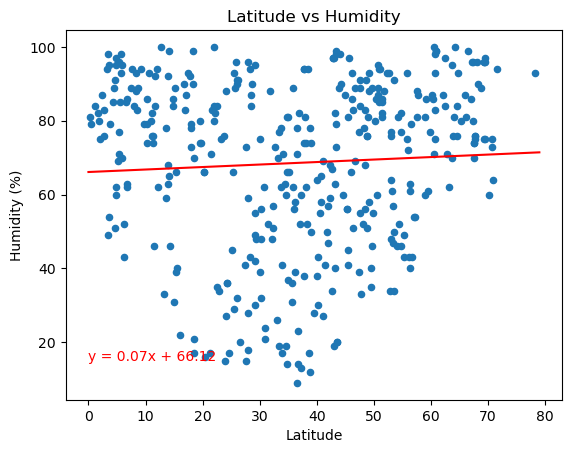

In [181]:
# Northern Hemisphere
create_linear_regession(
    regression_df = northern_hemi_data,
    x_col_name = "Lat",
    y_col_name = "Humidity",
    x_lab = "Latitude",
    y_lab = "Humidity (%)",
    title = f"Latitude vs Humidity",
    ann_x = 0,
    ann_y = 15
)

The r^2-value is: -0.010619992940789446


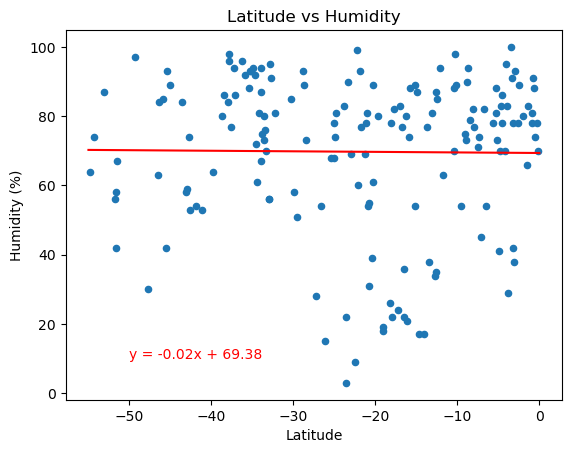

In [182]:
# Southern Hemisphere
create_linear_regession(
    regression_df = southern_hemi_data,
    x_col_name = "Lat",
    y_col_name = "Humidity",
    x_lab = "Latitude",
    y_lab = "Humidity (%)",
    title = f"Latitude vs Humidity",
    ann_x = -50,
    ann_y = 10
)

**Discussion about the linear relationship:**

We can be reasonably sure that there is no relationship between the latitude of a location and its humidity. We can see this through the (very low) r-values of 0.053 and 0.002 for the northern and southern hemispheres respectively.

This basically means that we can be fairly sure that there is no relationship between the two variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.06003418002250603


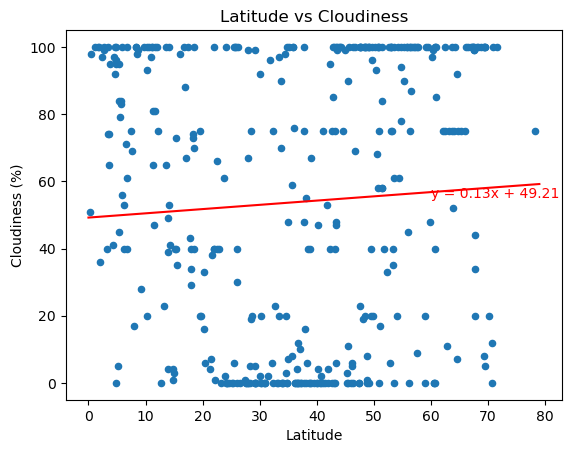

In [183]:
# Northern Hemisphere
create_linear_regession(
    regression_df = northern_hemi_data,
    x_col_name = "Lat",
    y_col_name = "Cloudiness",
    x_lab = "Latitude",
    y_lab = "Cloudiness (%)",
    title = f"Latitude vs Cloudiness",
    ann_x = 60, 
    ann_y = 55
)

The r^2-value is: -0.04845512556486996


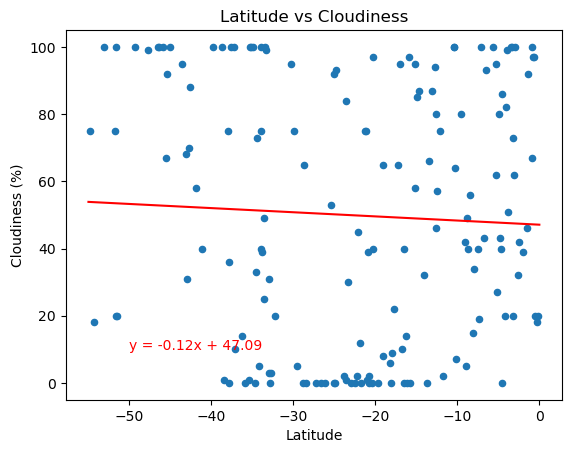

In [184]:
# Southern Hemisphere
create_linear_regession(
    regression_df = southern_hemi_data,
    x_col_name = "Lat",
    y_col_name = "Cloudiness",
    x_lab = "Latitude",
    y_lab = "Cloudiness (%)",
    title = f"Latitude vs Cloudiness",
    ann_x = -50,
    ann_y = 10
)

**Discussion about the linear relationship:** 

We can be reasonably sure that there is no relationship between the latitude of a location and its cloudiness. We can see this through the (very low) r-values of 0.067 and 0.106 for the northern and southern hemispheres respectively.

This basically means that we can be fairly sure that there is no relationship between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.26928671304317636


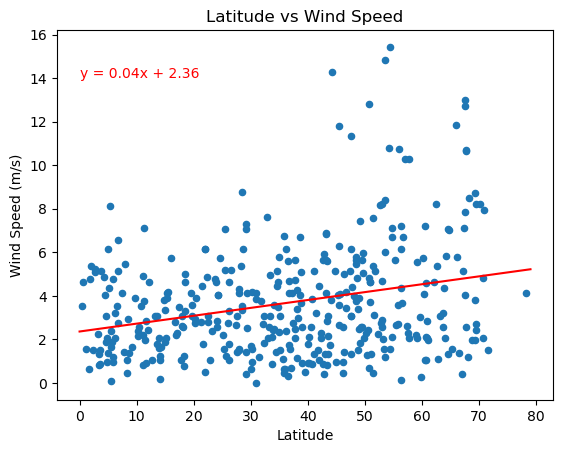

In [185]:
# Northern Hemisphere
create_linear_regession(
    regression_df = northern_hemi_data,
    x_col_name = "Lat",
    y_col_name = "Wind Speed",
    x_lab = "Latitude",
    y_lab = "Wind Speed (m/s)",
    title = f"Latitude vs Wind Speed",
    ann_x = 0,
    ann_y = 14
)

The r^2-value is: -0.2108726461266676


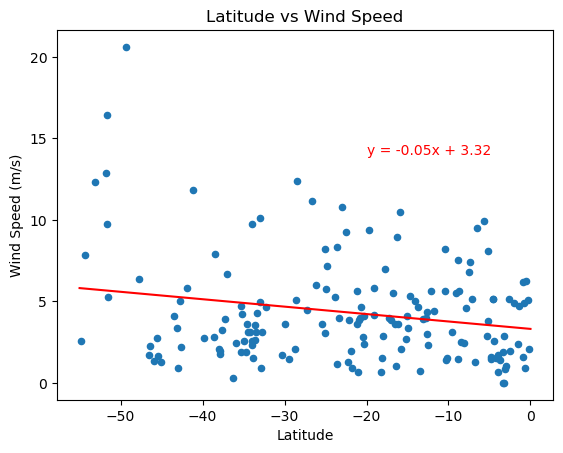

In [186]:
# Southern Hemisphere
create_linear_regession(
    regression_df = southern_hemi_data,
    x_col_name = "Lat",
    y_col_name = "Wind Speed",
    x_lab = "Latitude",
    y_lab = "Wind Speed (m/s)",
    title = f"Latitude vs Wind Speed",
    ann_x = -20,
    ann_y = 14
)

**Discussion about the linear relationship:**

We can be reasonably sure that there is no relationship between the latitude of a location and its wind speed. We can see this through the (very low) r-values of 0.184 and 0.231 for the northern and southern hemispheres respectively.

This basically means that we can be fairly sure that there is no relationship between the two variables.